In [ ]:
Num, Name = input("Reg. Number:"), input("Name:")

Reg. Number:19BCE1384
Name:Sulabh Kumar Jain


In [ ]:
import pandas as pd

df = pd.read_csv('/content/creditcard.csv')
df.shape





(284807, 31)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time


# Other Libraries
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
fradulent_amount = df[df['Class']==1]['Amount'].sum()
normal_amount = df[df['Class']==0]['Amount'].sum()
total_amount = df["Amount"].sum()
print("Fradulent transaction amount",fradulent_amount)
print("Normal transaction amount",normal_amount)
print("Total amount of transaction",total_amount)
print("Percentage lost due to fradulent transaction",(fradulent_amount*100)/total_amount)

Fradulent transaction amount 60127.97
Normal transaction amount 25102462.04
Total amount of transaction 25162590.009999998
Percentage lost due to fradulent transaction 0.2389577939953885


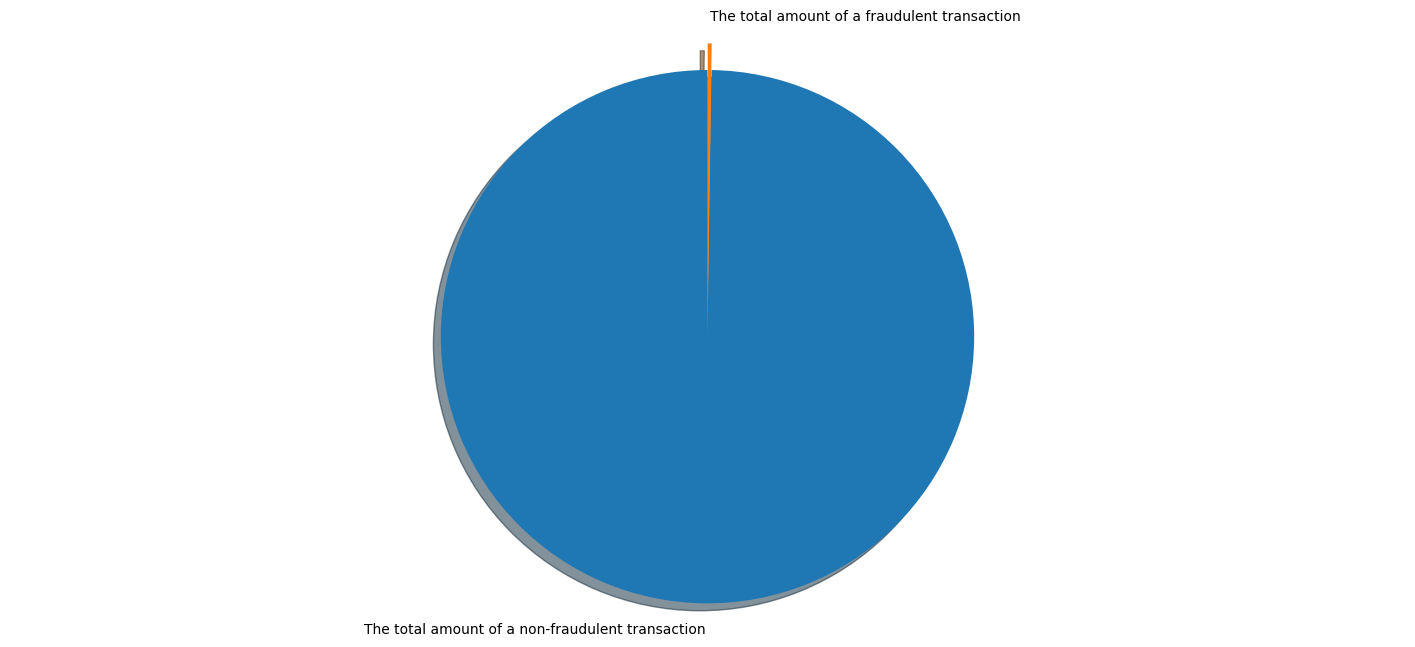

In [ ]:
import statistics
import matplotlib.pyplot as plt
# fraudulent_mean = statistics.mean(df1[df1['is_fraud']==1]['amt'])
# nonfraudulent_mean = statistics.mean(df1[df1['is_fraud']==0]['amt'])
d = {'Class':[0, 1], 'Mean':[normal_amount, fradulent_amount]}

fig, ax = plt.subplots(figsize=(18,8))

ax.pie(d["Mean"],
       explode=[0, 0.1],
       labels=['The total amount of a non-fraudulent transaction', 'The total amount of a fraudulent transaction'],
       shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
total_transaction = len(df)
normal_transaction = len(df[df["Class"] == 0])
fraudulent_transaction = len(df[df["Class"] == 1])
normal_percentage = (normal_transaction/(normal_transaction+fraudulent_transaction))*100
fraud_percentage = (fraudulent_transaction/(normal_transaction+fraudulent_transaction))*100
print('Total number of Trnsactions are {}'.format(total_transaction))
print('Number of Normal Transactions are {}'.format(normal_transaction))
print('Number of fraudulent Transactions are {}'.format(fraudulent_transaction))
print('Percentage of normal Transactions is {}'.format(normal_percentage))
print('Percentage of fraud Transactions is {}'.format(fraud_percentage))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of normal Transactions is 99.82725143693798
Percentage of fraud Transactions is 0.1727485630620034


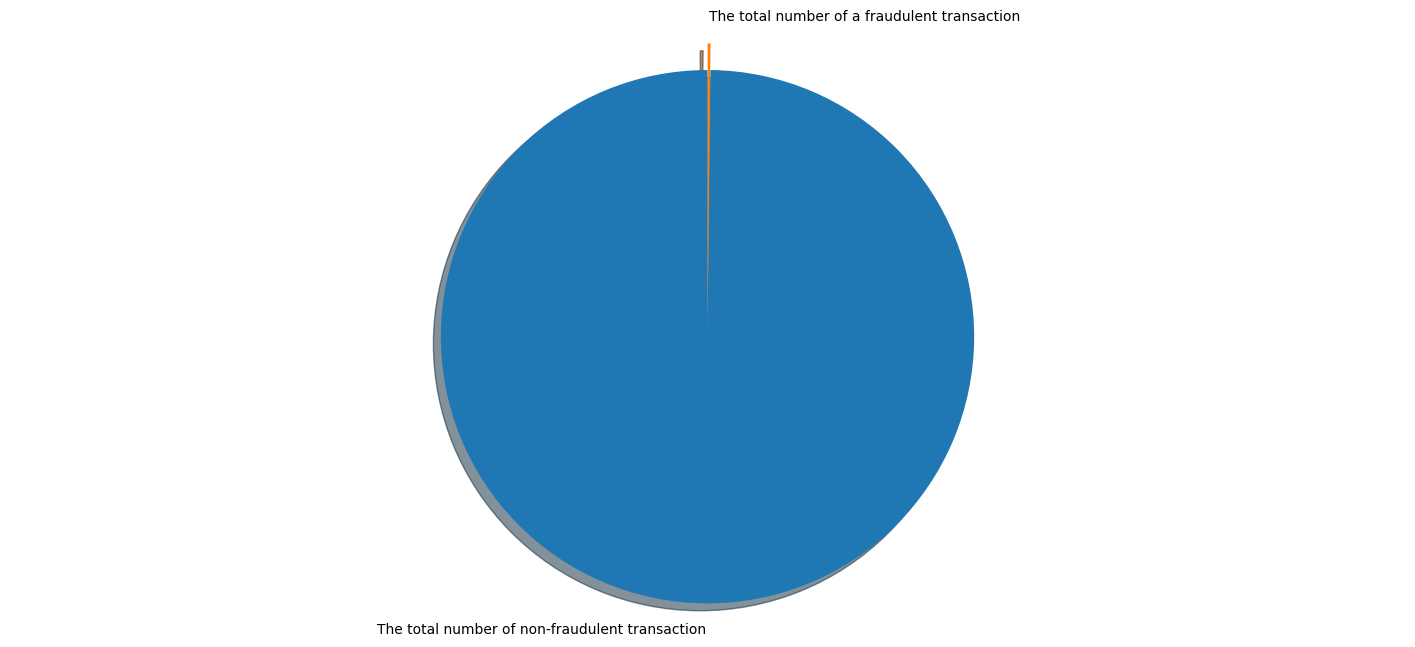

In [ ]:
# fraudulent_transaction_mean = statistics.mean(df1[df1['is_fraud']==1]['is_fraud'])
# normal_transaction_mean = statistics.mean(df1[df1['is_fraud']==0]['is_fraud'])
d = {'Class':[0, 1], 'Mean':[normal_transaction, fraudulent_transaction]}

fig, ax = plt.subplots(figsize=(18,8))

ax.pie(d["Mean"],
       explode=[0, 0.1],
       labels=['The total number of non-fraudulent transaction', 'The total number of a fraudulent transaction'],
       shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# corr_matrix=df.corr()
# # sns.heatmap(corr_matrix)
# plt.figure(1, figsize=(15,15))
# sns.heatmap(corr_matrix,annot=True,cbar=False,linewidths=0.5, linecolor='red',cmap="plasma")

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

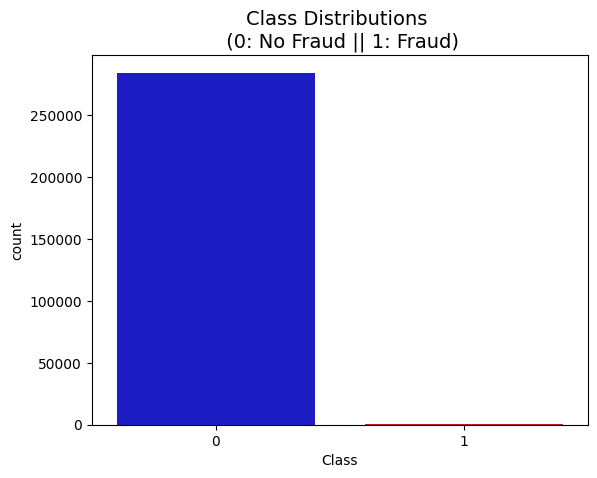

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


--- 1221.298449754715 seconds ---


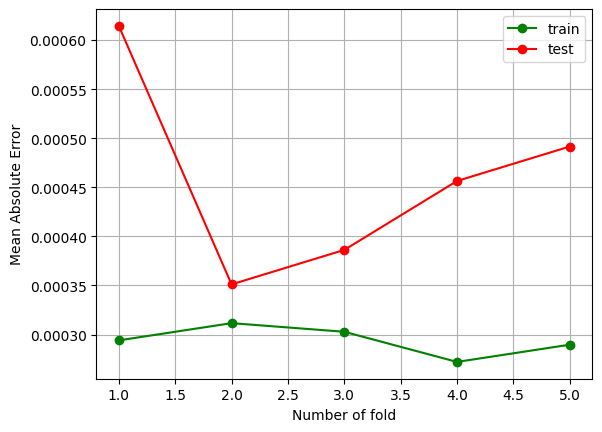

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
from xgboost import XGBClassifier
import time



X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

confusion=[]
accuracy=[]
precision=[]
recall=[]
specificity=[]
f1=[]
roc=[]
roc_auc=[]
mcc=[]
fpr=[]
gmean=[]

mae_train=[]
mae_test=[]

start_time = time.time()
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    # print("Length of train_set:",len(train_index)," Length of test_set:",len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
    model.fit(X_train,y_train)

    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)

    confusion.append(metrics.confusion_matrix(y_test,y_test_predictions))
    accuracy.append(metrics.accuracy_score(y_test, y_test_predictions))
    precision.append(metrics.precision_score(y_test, y_test_predictions))
    recall.append(metrics.recall_score(y_test, y_test_predictions))
    specificity.append(specificity_score(y_test, y_test_predictions))
    f1.append(metrics.f1_score(y_test, y_test_predictions))
    roc.append(metrics.roc_curve(y_test, y_test_predictions))
    roc_auc.append(metrics.roc_auc_score(y_test, y_test_predictions))
    mcc.append(metrics.matthews_corrcoef(y_test, y_test_predictions))
    gmean.append(geometric_mean_score(y_test, y_test_predictions))

    mae_train.append(metrics.mean_absolute_error(y_train, y_train_predictions))
    mae_test.append(metrics.mean_absolute_error(y_test, y_test_predictions))
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
import numpy as np

print("Accuracy of XGBClassifier is: ",np.mean(accuracy))
print("Precision of XGBClassifier is: ",np.mean(precision))
print("Recall of XGBClassifier is: ",np.mean(recall))
print("Specificity of XGBClassifier is: ",np.mean(specificity))
print("F1 score of XGBClassifier is: ",np.mean(f1))
print("False Positive Rate of XGBClassifier is: ",1-np.mean(specificity))
print("The AUC score of XGBClassifier is: ",np.mean(roc_auc))
print("The MCC score of XGBClassifier is: ",np.mean(mcc))
print("The G-Mean of XGBClassifier is: ",np.mean(gmean))

print("Array from ROC is",np.mean(roc,axis=0))

# print(roc)

Accuracy of XGBClassifier is:  0.9995400395553308
Precision of XGBClassifier is:  0.9249321010309967
Recall of XGBClassifier is:  0.7988043702329417
Specificity of XGBClassifier is:  0.999887448780402
F1 score of XGBClassifier is:  0.8571863167515342
False Positive Rate of XGBClassifier is:  0.00011255121959796721
The AUC score of XGBClassifier is:  0.8993459095066718
The MCC score of XGBClassifier is:  0.8593016755684284
The G-Mean of XGBClassifier is:  0.893584789779575
Array from ROC is [[0.0000000e+00 1.1255122e-04 1.0000000e+00]
 [0.0000000e+00 7.9880437e-01 1.0000000e+00]
 [2.0000000e+00 1.0000000e+00 0.0000000e+00]]


Round complete
Round complete
Round complete
Round complete
Round complete
--- 9359.54158949852 seconds ---


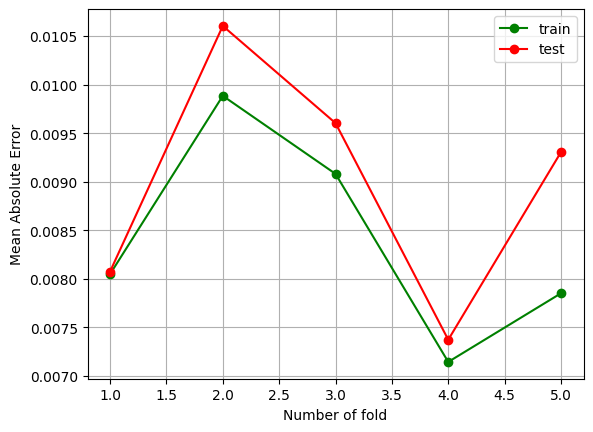

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
from xgboost import XGBClassifier
import time
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline



X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

confusion=[]
accuracy=[]
precision=[]
recall=[]
specificity=[]
f1=[]
roc=[]
roc_auc=[]
mcc=[]
fpr=[]
gmean=[]

mae_train=[]
mae_test=[]

start_time = time.time()
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    # print("Length of train_set:",len(train_index)," Length of test_set:",len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
    resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
    pipeline=Pipeline(steps=[('r', resample), ('m', model)])
    pipeline.fit(X_train, y_train)


    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)

    confusion.append(metrics.confusion_matrix(y_test,y_test_predictions))
    accuracy.append(metrics.accuracy_score(y_test, y_test_predictions))
    precision.append(metrics.precision_score(y_test, y_test_predictions))
    recall.append(metrics.recall_score(y_test, y_test_predictions))
    specificity.append(specificity_score(y_test, y_test_predictions))
    f1.append(metrics.f1_score(y_test, y_test_predictions))
    roc.append(metrics.roc_curve(y_test, y_test_predictions))
    roc_auc.append(metrics.roc_auc_score(y_test, y_test_predictions))
    mcc.append(metrics.matthews_corrcoef(y_test, y_test_predictions))
    gmean.append(geometric_mean_score(y_test, y_test_predictions))

    mae_train.append(metrics.mean_absolute_error(y_train, y_train_predictions))
    mae_test.append(metrics.mean_absolute_error(y_test, y_test_predictions))
    print("Round complete")
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
import numpy as np

print("Accuracy of XGBClassifier is: ",np.mean(accuracy))
print("Precision of XGBClassifier is: ",np.mean(precision))
print("Recall of XGBClassifier is: ",np.mean(recall))
print("Specificity of XGBClassifier is: ",np.mean(specificity))
print("F1 score of XGBClassifier is: ",np.mean(f1))
print("False Positive Rate of XGBClassifier is: ",1-np.mean(specificity))
print("The AUC score of XGBClassifier is: ",np.mean(roc_auc))
print("The MCC score of XGBClassifier is: ",np.mean(mcc))
print("The G-Mean of XGBClassifier is: ",np.mean(gmean))

print("Array from ROC is",np.mean(roc,axis=0))

# print(roc)

Accuracy of XGBClassifier is:  0.9910079481719751
Precision of XGBClassifier is:  0.1507613656909257
Recall of XGBClassifier is:  0.8922696351267781
Specificity of XGBClassifier is:  0.9911787981640081
F1 score of XGBClassifier is:  0.2575300438922584
False Positive Rate of XGBClassifier is:  0.008821201835991888
The AUC score of XGBClassifier is:  0.9417242166453932
The MCC score of XGBClassifier is:  0.3641513386012683
The G-Mean of XGBClassifier is:  0.9403578690017268
Array from ROC is [[0.         0.0088212  1.        ]
 [0.         0.89226964 1.        ]
 [2.         1.         0.        ]]


Round complete
Round complete
Round complete
Round complete
Round complete
--- 5999.1408767700195 seconds ---


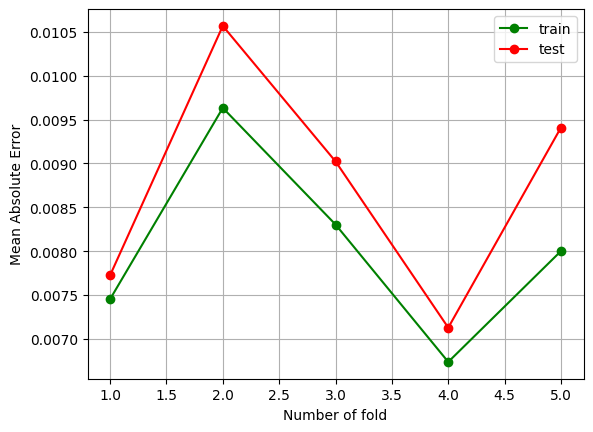

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import geometric_mean_score
from xgboost import XGBClassifier
import time
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline



X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

confusion=[]
accuracy=[]
precision=[]
recall=[]
specificity=[]
f1=[]
roc=[]
roc_auc=[]
mcc=[]
fpr=[]
gmean=[]

mae_train=[]
mae_test=[]

start_time = time.time()
for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    # print("Length of train_set:",len(train_index)," Length of test_set:",len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    enn = EditedNearestNeighbours()
    model = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
    pipeline = make_pipeline_imb(SMOTE(), enn, model)
    pipeline.fit(X_train, y_train)


    y_train_predictions = model.predict(X_train)
    y_test_predictions = model.predict(X_test)

    confusion.append(metrics.confusion_matrix(y_test,y_test_predictions))
    accuracy.append(metrics.accuracy_score(y_test, y_test_predictions))
    precision.append(metrics.precision_score(y_test, y_test_predictions))
    recall.append(metrics.recall_score(y_test, y_test_predictions))
    specificity.append(specificity_score(y_test, y_test_predictions))
    f1.append(metrics.f1_score(y_test, y_test_predictions))
    roc.append(metrics.roc_curve(y_test, y_test_predictions))
    roc_auc.append(metrics.roc_auc_score(y_test, y_test_predictions))
    mcc.append(metrics.matthews_corrcoef(y_test, y_test_predictions))
    gmean.append(geometric_mean_score(y_test, y_test_predictions))

    mae_train.append(metrics.mean_absolute_error(y_train, y_train_predictions))
    mae_test.append(metrics.mean_absolute_error(y_test, y_test_predictions))
    print("Round complete")
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

folds = range(1, sss.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
import numpy as np

print("Accuracy of XGBClassifier is: ",np.mean(accuracy))
print("Precision of XGBClassifier is: ",np.mean(precision))
print("Recall of XGBClassifier is: ",np.mean(recall))
print("Specificity of XGBClassifier is: ",np.mean(specificity))
print("F1 score of XGBClassifier is: ",np.mean(f1))
print("False Positive Rate of XGBClassifier is: ",1-np.mean(specificity))
print("The AUC score of XGBClassifier is: ",np.mean(roc_auc))
print("The MCC score of XGBClassifier is: ",np.mean(mcc))
print("The G-Mean of XGBClassifier is: ",np.mean(gmean))

print("Array from ROC is",np.mean(roc,axis=0))

# print(roc)

Accuracy of XGBClassifier is:  0.9912291507975528
Precision of XGBClassifier is:  0.15417188920327754
Recall of XGBClassifier is:  0.8902082044939188
Specificity of XGBClassifier is:  0.9914039006032043
F1 score of XGBClassifier is:  0.26232896099579217
False Positive Rate of XGBClassifier is:  0.008596099396795731
The AUC score of XGBClassifier is:  0.9408060525485615
The MCC score of XGBClassifier is:  0.3677649286840551
The G-Mean of XGBClassifier is:  0.9393774349328128
Array from ROC is [[0.        0.0085961 1.       ]
 [0.        0.8902082 1.       ]
 [2.        1.        0.       ]]


In [ ]:
from google.colab import auth
auth.authenticate_user()
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
user = gcloud_tokeninfo['email']
import datetime
dt = datetime.datetime.now()
x = str(dt).split('.')[0]
print(f"This Script is executed by: ",user, "at", x)

This Script is executed by:  chinujain1999@gmail.com at 2023-04-13 18:16:58
